In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#stats libraries
import statsmodels.api as sm
import scipy

%matplotlib inline

In [3]:
#importing data
locomotion_data = pd.read_csv('worm_basal_locomotion.dat', sep='\s+',index_col='time')

In [4]:
locomotion_data.head(5)

,date,plate,strain,frame,ID,persistance,area,speed,angularspeed,length,...,loc_x,loc_y,vel_x,vel_y,orient,crab,NA,NA.1,NA.2,NA.3
time,,,,,,,,,,,,,,,,,,,,,
5.079,NaN,NaN,N2,126,1,44.9,0.118827,NaN,NaN,0.6912,...,5.2853,25.2352,NaN,NaN,144.9,NaN,0,0,0,0
5.123,NaN,NaN,N2,127,1,44.9,0.118827,NaN,NaN,0.6912,...,5.2813,25.2391,NaN,NaN,145.1,NaN,0,0,0,0
5.163,NaN,NaN,N2,128,1,44.9,0.117369,NaN,NaN,0.6750,...,5.2762,25.2438,NaN,NaN,144.9,NaN,0,0,0,0
5.209,NaN,NaN,N2,129,1,44.9,0.115182,NaN,NaN,0.6912,...,5.2728,25.2467,NaN,NaN,145.0,NaN,0,0,0,0
5.242,NaN,NaN,N2,130,1,44.9,0.113724,NaN,NaN,0.6912,...,5.2677,25.2514,NaN,NaN,144.7,NaN,0,0,0,0


In [5]:
#making smaller data set
speed_df= locomotion_data[['ID','speed']]
speed_df.head(5)

,ID,speed
time,,
5.079,1,NaN
5.123,1,NaN
5.163,1,NaN
5.209,1,NaN
5.242,1,NaN


In [6]:
speed_df = speed_df.dropna()
speed_df.head(5)

,ID,speed
time,,
5.363,1,0.1922
5.403,1,0.1892
5.443,1,0.1932
5.483,1,0.1919
5.524,1,0.1866


In [7]:
speed_df.index = pd.to_datetime(speed_df.index, unit='s')
speed_df.head(5)

,ID,speed
1970-01-01 00:00:05.363,1,0.1922
1970-01-01 00:00:05.403,1,0.1892
1970-01-01 00:00:05.443,1,0.1932
1970-01-01 00:00:05.483,1,0.1919
1970-01-01 00:00:05.524,1,0.1866


In [8]:
speed_remix = speed_df.groupby('ID').resample('10s', how='mean')
speed_remix

speed
ID                               
1   1970-01-01 00:00:00  0.198754
    1970-01-01 00:00:10  0.182466
    1970-01-01 00:00:20  0.107933
    1970-01-01 00:00:30  0.216202
    1970-01-01 00:00:40  0.242328
4   1970-01-01 00:00:00  0.179244
    1970-01-01 00:00:10  0.174174
    1970-01-01 00:00:20  0.197735
    1970-01-01 00:00:30  0.223789
    1970-01-01 00:00:40  0.189563
    1970-01-01 00:00:50  0.267708
5   1970-01-01 00:00:00  0.130003
    1970-01-01 00:00:10  0.173761
    1970-01-01 00:00:20  0.175286
    1970-01-01 00:00:30  0.090638
    1970-01-01 00:00:40  0.171291
    1970-01-01 00:00:50  0.170006
    1970-01-01 00:01:00  0.192885
    1970-01-01 00:01:10  0.213570
    1970-01-01 00:01:20  0.206213
    1970-01-01 00:01:30  0.237992
    1970-01-01 00:01:40  0.184528
    1970-01-01 00:01:50  0.173528
    1970-01-01 00:02:00  0.077084
    1970-01-01 00:02:10  0.135133
    1970-01-01 00:02:20  0.094113
    1970-01-01 00:02:30  0.044333
    1970-01-01 00:02:40  0.037018
    1970-01-01 00:02:50  0.038547
    1970-01-01 00:03:00  0.032183
...                           ...
324 1970-01-01 00:07:30  0.164127
    1970-01-01 00:07:40  0.187863
    1970-01-01 00:07:50  0.171447
    1970-01-01 00:08:00  0.171187
    1970-01-01 00:08:10  0.142347
    1970-01-01 00:08:20  0.178724
    1970-01-01 00:08:30  0.151885
    1970-01-01 00:08:40  0.101055
    1970-01-01 00:08:50  0.110602
    1970-01-01 00:09:00  0.090933
    1970-01-01 00:09:10  0.092290
    1970-01-01 00:09:20  0.112751
    1970-01-01 00:09:30  0.077627
    1970-01-01 00:09:40  0.063054
    1970-01-01 00:09:50  0.021543
410 1970-01-01 00:07:30  0.206721
    1970-01-01 00:07:40  0.191637
    1970-01-01 00:07:50  0.137978
    1970-01-01 00:08:00  0.066882
    1970-01-01 00:08:10  0.073763
    1970-01-01 00:08:20  0.031894
    1970-01-01 00:08:30  0.063821
    1970-01-01 00:08:40  0.030660
    1970-01-01 00:08:50  0.047546
    1970-01-01 00:09:00  0.029659
    1970-01-01 00:09:10  0.020351
    1970-01-01 00:09:20  0.063349
    1970-01-01 00:09:30  0.018253
    1970-01-01 00:09:40  0.039216
    1970-01-01 00:09:50  0.025057

[1334 rows x 1 columns]

In [9]:
speed_remix = speed_remix.reset_index()
speed_remix.columns = [['ID', 'time','speed']]
speed_remix.head(5)

,ID,time,speed
0,1,1970-01-01 00:00:00,0.198754
1,1,1970-01-01 00:00:10,0.182466
2,1,1970-01-01 00:00:20,0.107933
3,1,1970-01-01 00:00:30,0.216202
4,1,1970-01-01 00:00:40,0.242328


In [10]:
#jank
speed_remix['time'] = speed_remix.time.astype(np.int64)/1000000000


In [11]:
speed_remix.head(5)

,ID,time,speed
0,1,0,0.198754
1,1,10,0.182466
2,1,20,0.107933
3,1,30,0.216202
4,1,40,0.242328


<function matplotlib.pyplot.show>

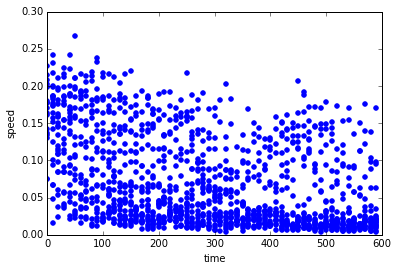

In [14]:
#scatterplot
speed_remix.plot(kind = 'scatter', x='time',y='speed', color='b')

plt.xlim(0,600)
plt.ylim(0,0.3)

plt.show

In [37]:
#linnear regression
lm = sm.formula.ols(formula='speed ~ time', data=speed_remix).fit()

In [38]:
#makin it frame
x_new = pd.DataFrame({'time' : range(1,700)})

SyntaxError: invalid syntax (<ipython-input-34-21bbbb8d31e9>, line 1)

In [47]:
#making prediction
y_preds = lm.predict(x_new)


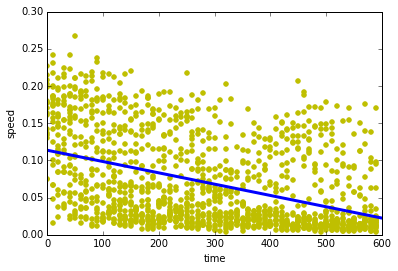

In [51]:
speed_remix.plot(kind='scatter',x='time',y='speed', color='y')
plt.xlim(0,600)
plt.ylim(0,.3)
plt.plot(x_new,y_preds,c='g',linewidth='3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B9C2630>]], dtype=object)

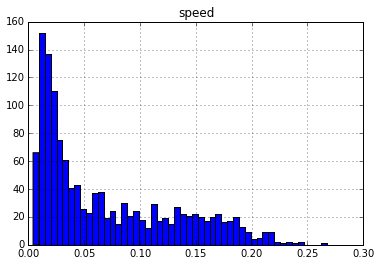

In [44]:
speed_remix.hist(column='speed',bins=50)

In [52]:
#getting the ends
bag_end = speed_remix[(speed_remix.time==10)|(speed_remix.time==590)]

In [53]:
bag_end.head(5)

,ID,time,speed
1,1,10,0.182466
6,4,10,0.174174
12,5,10,0.173761
40,6,10,0.067486
98,6,590,0.019512


<function matplotlib.pyplot.show>

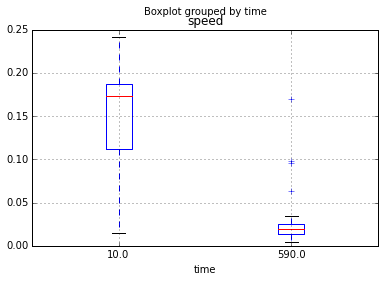

In [54]:
#makin a boxplot
bag_end.boxplot(by='time',column='speed')
plt.show

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000006048278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000006103198>], dtype=object)

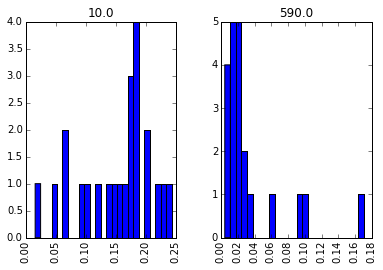

In [55]:
#makin a histogram
bag_end.hist(by='time',column='speed',bins=25)

In [59]:
beg = bag_end.speed[bag_end.time==10]
end = bag_end.speed[bag_end.time==590]

In [62]:
scipy.stats.shapiro(beg)


(0.9341524243354797, 0.13445772230625153)

In [63]:
scipy.stats.shapiro(end)

(0.655042290687561, 7.968059435370378e-06)

In [64]:
scipy.stats.mstats.kruskalwallis(beg, end)

(24.001242236024837, 9.6273566151461083e-07)